# No Sampling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

In [2]:
# テキストファイルを読み込む
with open('./ga-world-models-no_sampling/results/fitness_1_1_.txt', 'r') as file:  # 'data.txt'はファイルのパスを適切に指定してください
    lines = file.readlines()

# データを格納するための空のリストを作成
data = []

# 各行を処理してデータを抽出し、リストに追加
for line in lines:
    # 各行をタブで分割
    parts = line.strip().split('\t')
    
    # データを辞書に格納してリストに追加
    row_data = {
        'Average': float(parts[2]),
        'Max': float(parts[4]),
        'Max ever': float(parts[6]),
        'Time': float(parts[8])
    }
    
    data.append(row_data)

# リストからデータフレームを作成
df = pd.DataFrame(data)

# データフレームの内容を表示
print(df)


        Average         Max    Max ever         Time
0      7.623623   54.202373   54.202373   121.379057
1     12.620679   55.135479   55.135479   138.402952
2     26.074584   71.515302   71.515302   201.879302
3     43.554268   64.672819   71.515302   266.211510
4     50.749891   74.485265   74.485265   276.187046
..          ...         ...         ...          ...
250  637.678469  822.259402  865.704835  1080.088256
251  622.182273  774.247855  865.704835  1014.185479
252  610.271425  826.287847  865.704835  1095.890452
253  633.208576  825.149857  865.704835   995.968653
254  606.669967  823.945880  865.704835  1073.350145

[255 rows x 4 columns]


In [3]:
# テキストファイルを読み込む
with open('./ga-world-models-no_sampling/results/individual_fitness_1_1_.txt', 'r') as file:
    lines = file.readlines()

# データを格納するためのリストを初期化
data = []

# 各行を解析してデータを抽出
for line in lines:
    parts = line.strip().split()  # 空白文字で行を分割
    generation = int(parts[1])    # 世代番号を取得
    fitness = float(parts[3])     # Fitness値を取得
    data.append((generation, fitness))

# データフレームを作成
df2 = pd.DataFrame(data, columns=['Generation', 'Fitness'])

# データフレームの内容を表示
print(df2)

       Generation     Fitness
0               0   51.733421
1               0   54.202373
2               0   51.438290
3               0   47.157143
4               0   45.016949
...           ...         ...
25495         254  720.222535
25496         254  718.781481
25497         254  714.951515
25498         254  714.242236
25499         254  823.945880

[25500 rows x 2 columns]


In [4]:
# 世代ごとのfitnessの標準偏差を計算
std_deviation_by_generation = df2.groupby('Generation')['Fitness'].std()

# 結果を表示
print(std_deviation_by_generation)

Generation
0      12.804977
1      18.203963
2      12.488609
3       6.812336
4       8.570891
         ...    
250    68.689384
251    47.453873
252    53.990538
253    47.200449
254    66.710168
Name: Fitness, Length: 255, dtype: float64


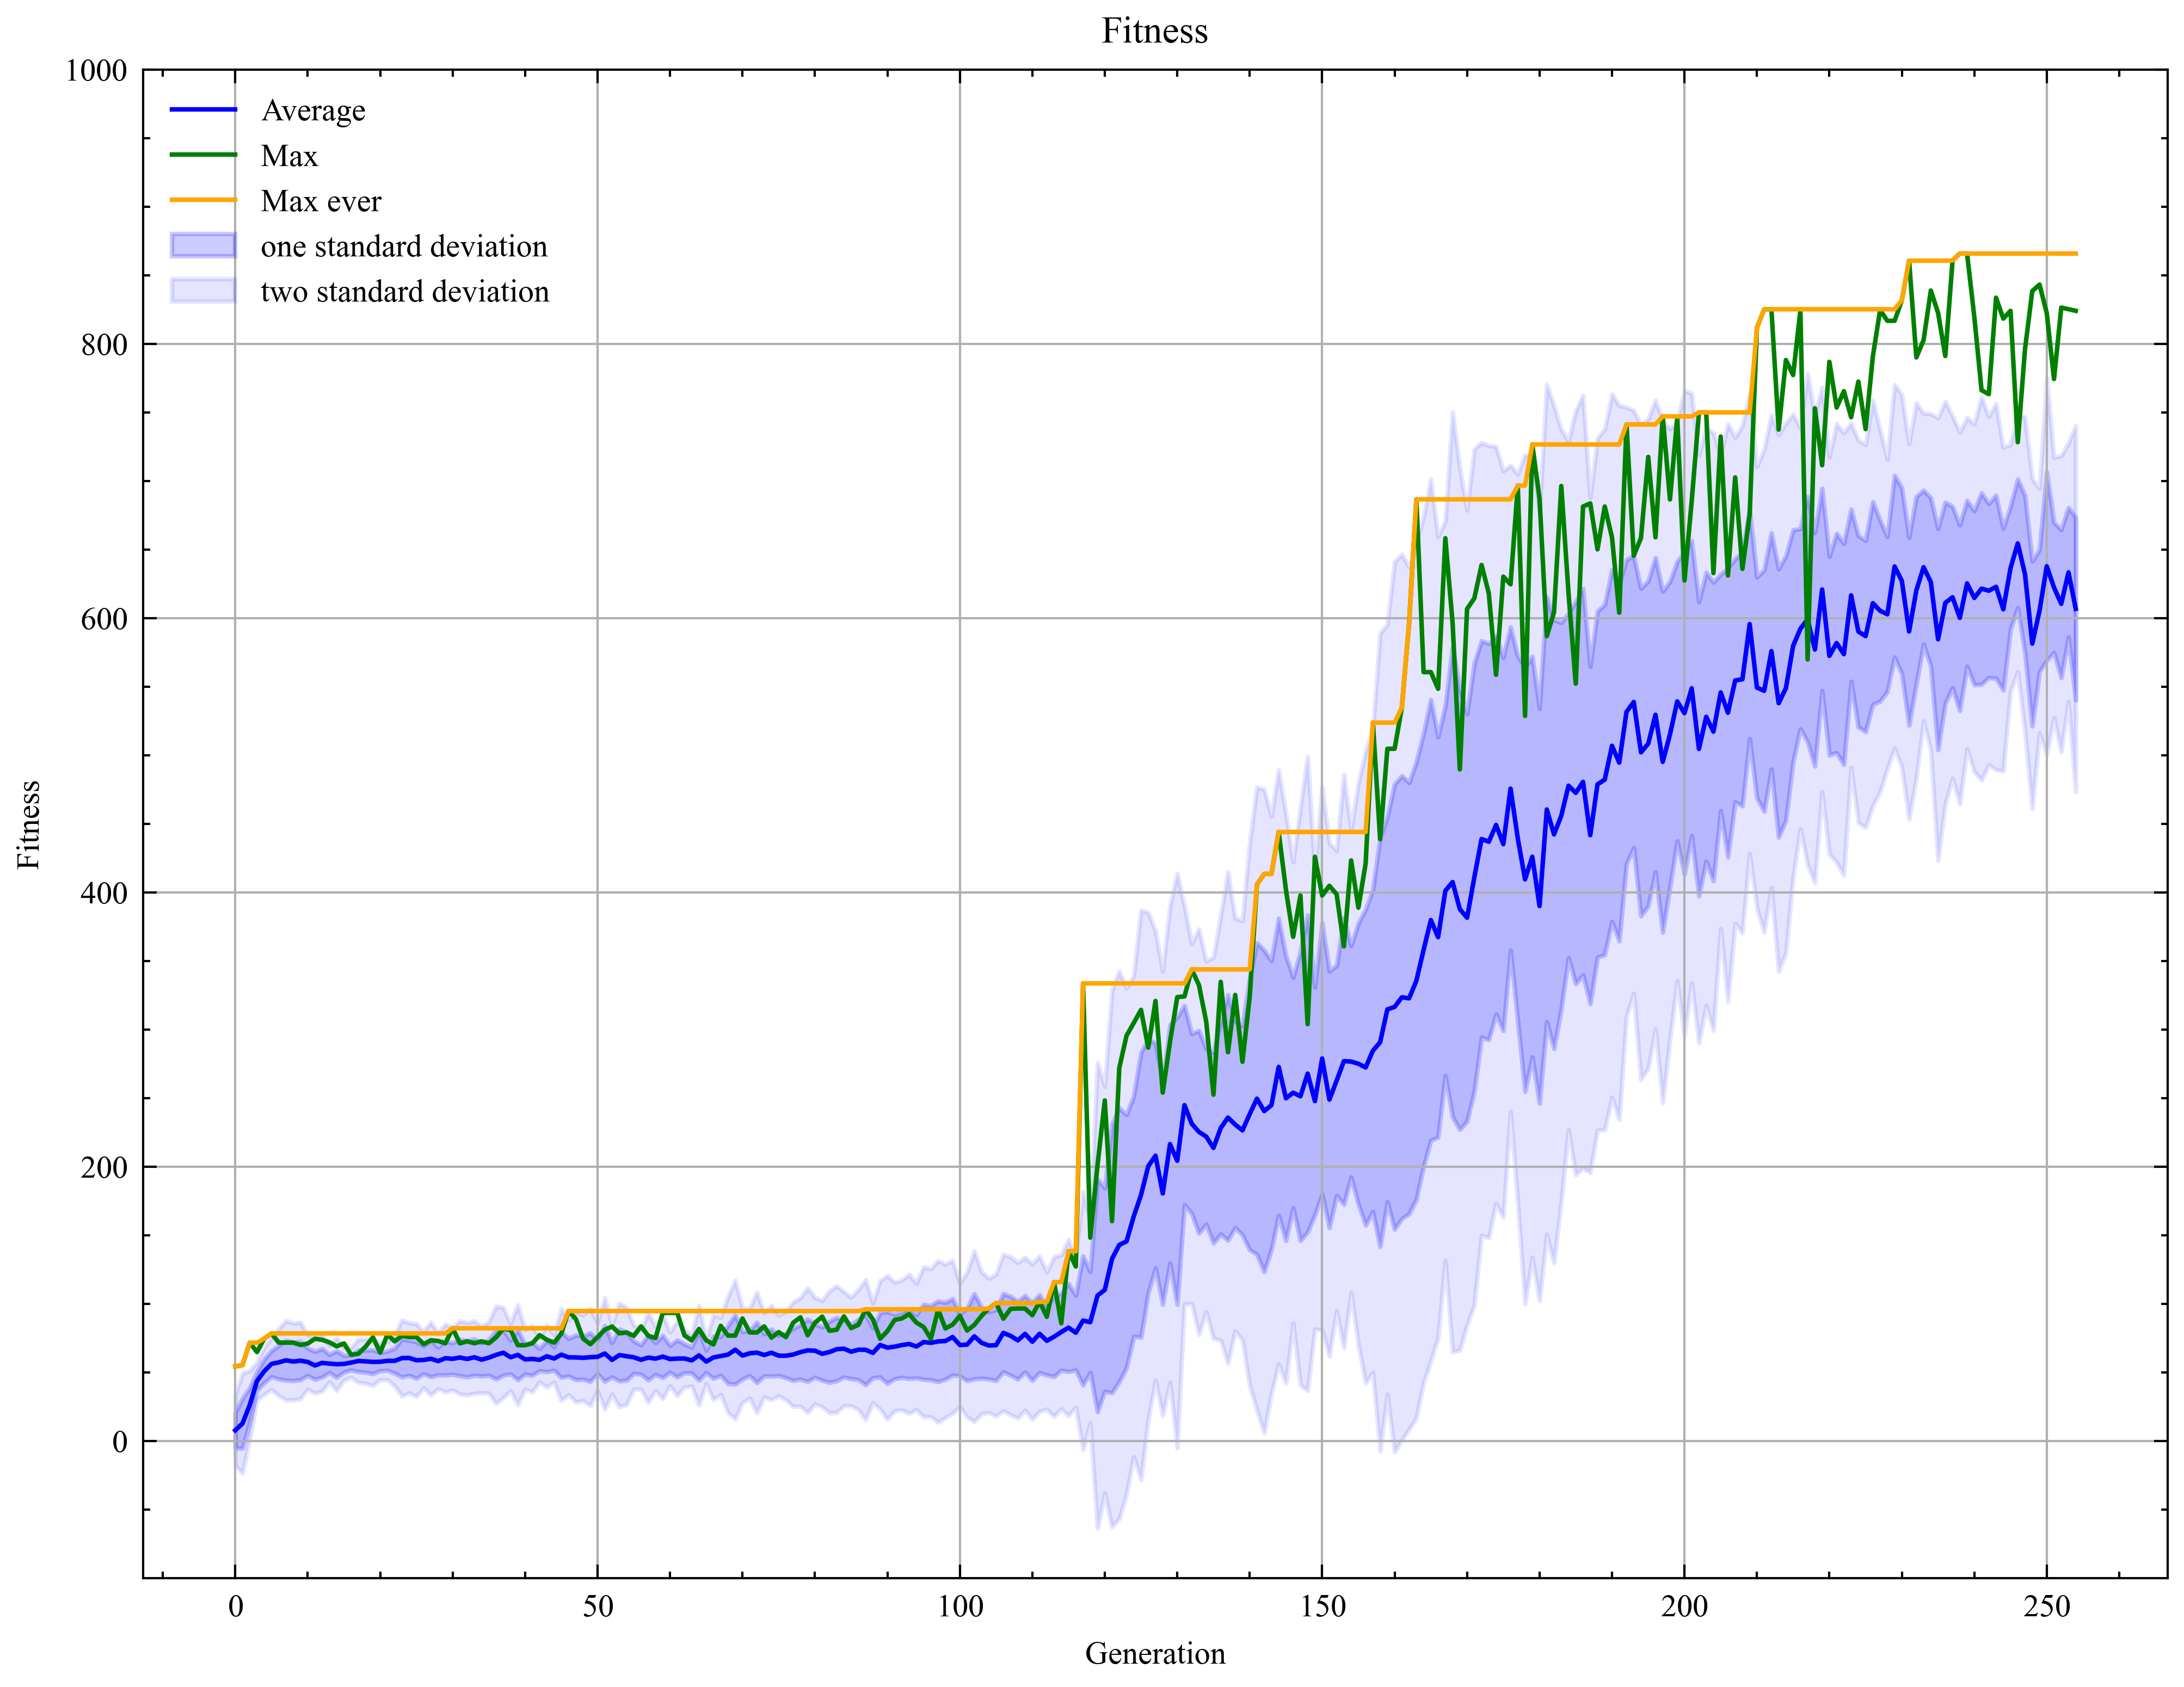

In [6]:
plt.style.use(['science', 'no-latex', 'nature'])
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.figure(figsize=(8, 6), dpi=600)

# データフレームの内容を表示
average = df['Average']
max = df['Max']
max_ever = df['Max ever']
std_plus = average + std_deviation_by_generation
std_minus = average - std_deviation_by_generation
std_2_plus = average + 2 * std_deviation_by_generation
std_2_minus = average - 2 * std_deviation_by_generation

# グラフを描画
x = np.arange(0, len(average))
plt.plot(x, average, label='Average', color='blue')
plt.plot(x, max, label='Max', color='green')
plt.plot(x, max_ever, label='Max ever', color='orange')
plt.fill_between(x, std_plus, std_minus, alpha=0.2, label='one standard deviation', color='blue')
plt.fill_between(x, std_2_plus, std_2_minus, alpha=0.1, label='two standard deviation', color='blue')

# y軸の範囲を設定
plt.ylim(-100, 1000)

# グラフのタイトル
plt.title('Fitness')

# x軸のラベル
plt.xlabel('Generation')

# y軸のラベル
plt.ylabel('Fitness')

# 凡例を表示
plt.legend()

# グリッドを表示
plt.grid(True)

# グラフを保存
plt.savefig('./img/fitness_no_sampling.png')

# グラフを表示
plt.show()

# Sampling

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

In [8]:
# テキストファイルを読み込む
with open('./ga-world-models-sampling/results/fitness_1_1_.txt', 'r') as file:  # 'data.txt'はファイルのパスを適切に指定してください
    lines = file.readlines()

# データを格納するための空のリストを作成
data = []

# 各行を処理してデータを抽出し、リストに追加
for line in lines:
    # 各行をタブで分割
    parts = line.strip().split('\t')
    
    # データを辞書に格納してリストに追加
    row_data = {
        'Average': float(parts[2]),
        'Max': float(parts[4]),
        'Max ever': float(parts[6]),
        'Time': float(parts[8])
    }
    
    data.append(row_data)

# リストからデータフレームを作成
df = pd.DataFrame(data)

# データフレームの内容を表示
print(df)


        Average         Max    Max ever         Time
0      5.242936    7.840846    7.840846    53.280046
1      5.658755    8.930884    8.930884    62.780413
2      6.086935   12.224279   12.224279    65.352729
3      6.625442   11.158524   12.224279    71.511579
4      7.466683   10.845998   12.224279    81.326906
..          ...         ...         ...          ...
497  416.286905  573.254288  741.768968  1006.753060
498  447.047079  602.202314  741.768968  1032.899881
499  444.964873  630.549202  741.768968   944.309307
500  440.103057  525.917562  741.768968   862.636402
501  419.919307  592.269140  741.768968   991.085648

[502 rows x 4 columns]


In [9]:
# テキストファイルを読み込む
with open('./ga-world-models-sampling/results/individual_fitness_1_1_.txt', 'r') as file:
    lines = file.readlines()

# データを格納するためのリストを初期化
data = []

# 各行を解析してデータを抽出
for line in lines:
    parts = line.strip().split()  # 空白文字で行を分割
    generation = int(parts[1])    # 世代番号を取得
    fitness = float(parts[3])     # Fitness値を取得
    data.append((generation, fitness))

# データフレームを作成
df2 = pd.DataFrame(data, columns=['Generation', 'Fitness'])

# データフレームの内容を表示
print(df2)

       Generation     Fitness
0               0    5.622442
1               0    7.840846
2               0    5.280352
3               0    9.301038
4               0    7.823567
...           ...         ...
50195         501  493.656655
50196         501  491.324855
50197         501  491.057576
50198         501  483.417747
50199         501  592.269140

[50200 rows x 2 columns]


In [10]:
# 世代ごとのfitnessの標準偏差を計算
std_deviation_by_generation = df2.groupby('Generation')['Fitness'].std()

# 結果を表示
print(std_deviation_by_generation)

Generation
0       0.821046
1       1.804610
2       2.569957
3       3.689647
4       5.503120
         ...    
497    89.852924
498    98.989198
499    90.982448
500    92.987760
501    97.853028
Name: Fitness, Length: 502, dtype: float64


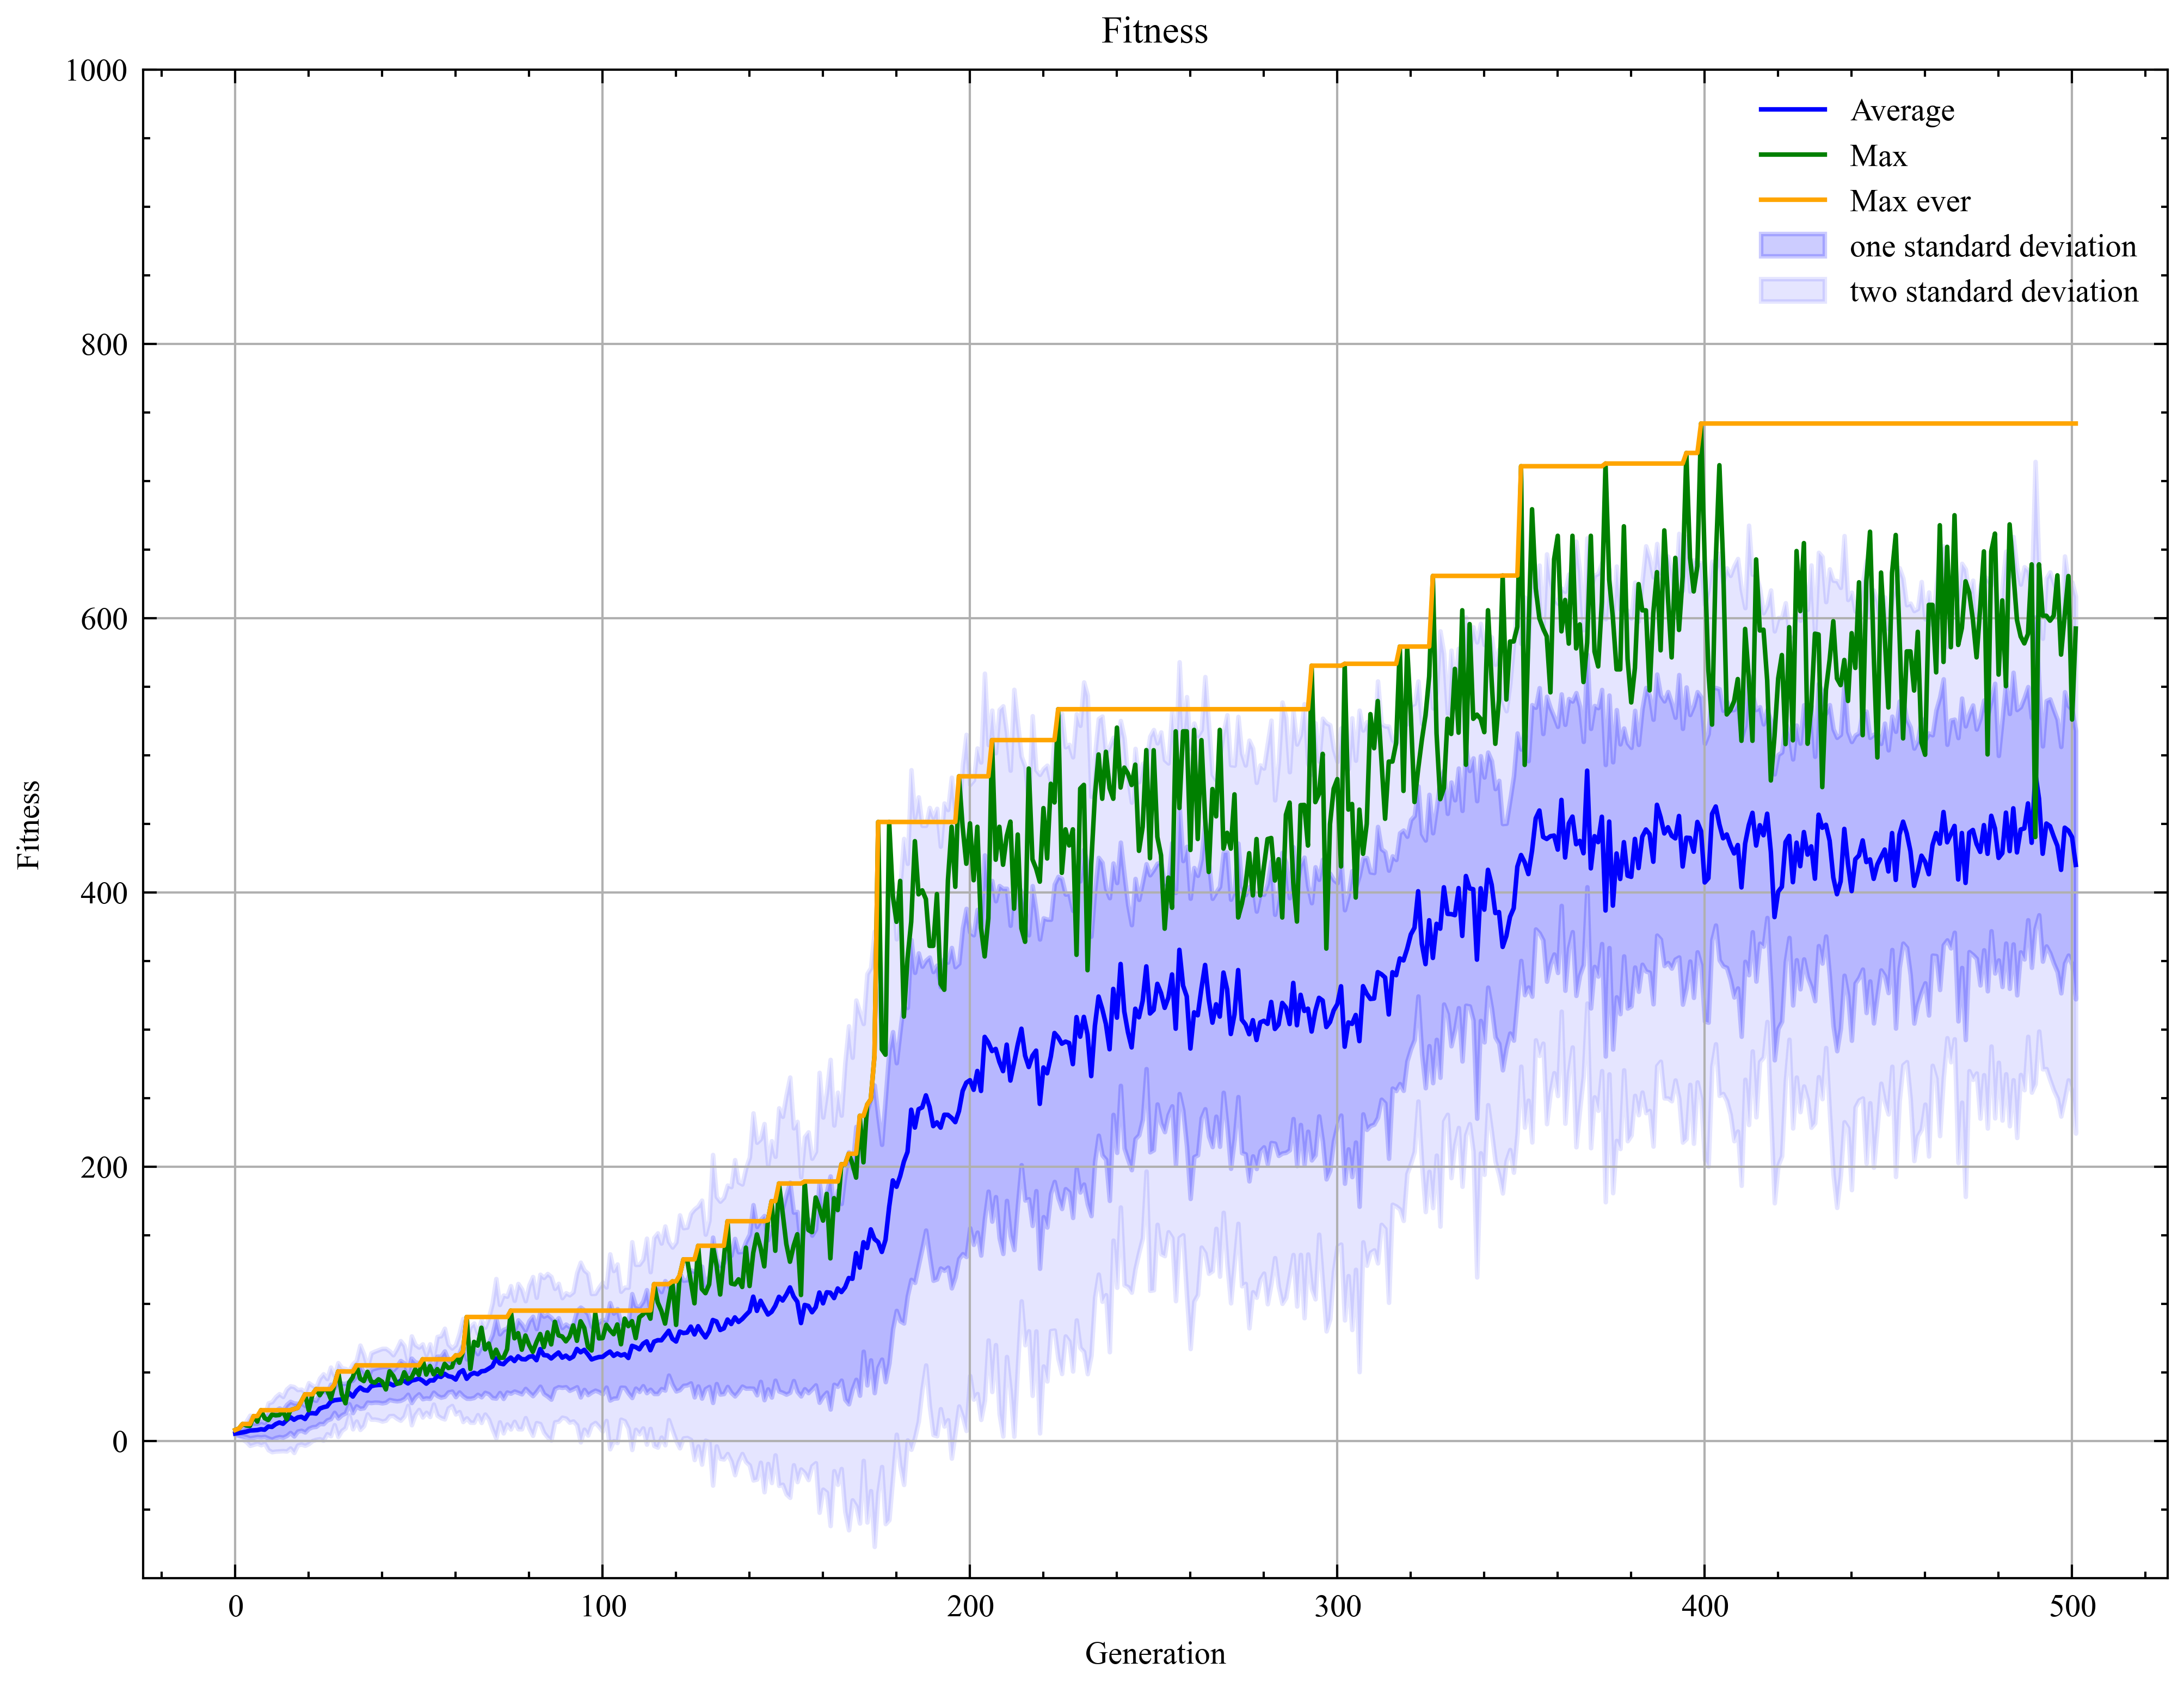

In [11]:
plt.style.use(['science', 'no-latex', 'nature'])
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.figure(figsize=(8, 6), dpi=600)

# データフレームの内容を表示
average = df['Average']
max = df['Max']
max_ever = df['Max ever']
std_plus = average + std_deviation_by_generation
std_minus = average - std_deviation_by_generation
std_2_plus = average + 2 * std_deviation_by_generation
std_2_minus = average - 2 * std_deviation_by_generation

# グラフを描画
x = np.arange(0, len(average))
plt.plot(x, average, label='Average', color='blue')
plt.plot(x, max, label='Max', color='green')
plt.plot(x, max_ever, label='Max ever', color='orange')
plt.fill_between(x, std_plus, std_minus, alpha=0.2, label='one standard deviation', color='blue')
plt.fill_between(x, std_2_plus, std_2_minus, alpha=0.1, label='two standard deviation', color='blue')

# グラフのタイトル
plt.title('Fitness')

# y軸の範囲を設定
plt.ylim(-100, 1000)

# x軸のラベル
plt.xlabel('Generation')

# y軸のラベル
plt.ylabel('Fitness')

# 凡例を表示
plt.legend()

# グリッドを表示
plt.grid(True)

# グラフを保存
plt.savefig('./img/fitness_sampling.png')

# グラフを表示
plt.show()

# No Sampling AE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

In [2]:
# テキストファイルを読み込む
with open('./ga-world-models-AE/results/fitness_1_1_.txt', 'r') as file:  # 'data.txt'はファイルのパスを適切に指定してください
    lines = file.readlines()

# データを格納するための空のリストを作成
data = []

# 各行を処理してデータを抽出し、リストに追加
for line in lines:
    # 各行をタブで分割
    parts = line.strip().split('\t')
    
    # データを辞書に格納してリストに追加
    row_data = {
        'Average': float(parts[2]),
        'Max': float(parts[4]),
        'Max ever': float(parts[6]),
        'Time': float(parts[8])
    }
    
    data.append(row_data)

# リストからデータフレームを作成
df = pd.DataFrame(data)

# データフレームの内容を表示
print(df)


        Average         Max    Max ever        Time
0      7.787415   55.341849   55.341849   57.665778
1     12.290309   62.341087   62.341087   64.045817
2     22.608858   57.819981   62.341087   72.136504
3     35.514454   72.462979   72.462979  102.101657
4     43.682158   65.578062   72.462979  109.578562
..          ...         ...         ...         ...
244  596.572860  730.361316  810.868943  481.972612
245  637.776931  737.503017  810.868943  433.735540
246  592.225377  774.981903  810.868943  488.645893
247  583.610480  813.804979  813.804979  493.286784
248  581.375293  734.911693  813.804979  476.594019

[249 rows x 4 columns]


In [3]:
# テキストファイルを読み込む
with open('./ga-world-models-AE/results/individual_fitness_1_1_.txt', 'r') as file:
    lines = file.readlines()

# データを格納するためのリストを初期化
data = []

# 各行を解析してデータを抽出
for line in lines:
    parts = line.strip().split()  # 空白文字で行を分割
    generation = int(parts[1])    # 世代番号を取得
    fitness = float(parts[3])     # Fitness値を取得
    data.append((generation, fitness))

# データフレームを作成
df2 = pd.DataFrame(data, columns=['Generation', 'Fitness'])

# データフレームの内容を表示
print(df2)

       Generation     Fitness
0               0   55.341849
1               0   34.234274
2               0   36.100835
3               0   33.471429
4               0   32.671795
...           ...         ...
24895         248  686.124555
24896         248  677.413523
24897         248  668.410256
24898         248  654.516981
24899         248  734.911693

[24900 rows x 2 columns]


In [4]:
# 世代ごとのfitnessの標準偏差を計算
std_deviation_by_generation = df2.groupby('Generation')['Fitness'].std()

# 結果を表示
print(std_deviation_by_generation)

Generation
0      10.847310
1      14.926859
2      13.419430
3      14.101900
4      17.708390
         ...    
244    65.790556
245    58.672843
246    72.953574
247    78.841136
248    81.042701
Name: Fitness, Length: 249, dtype: float64


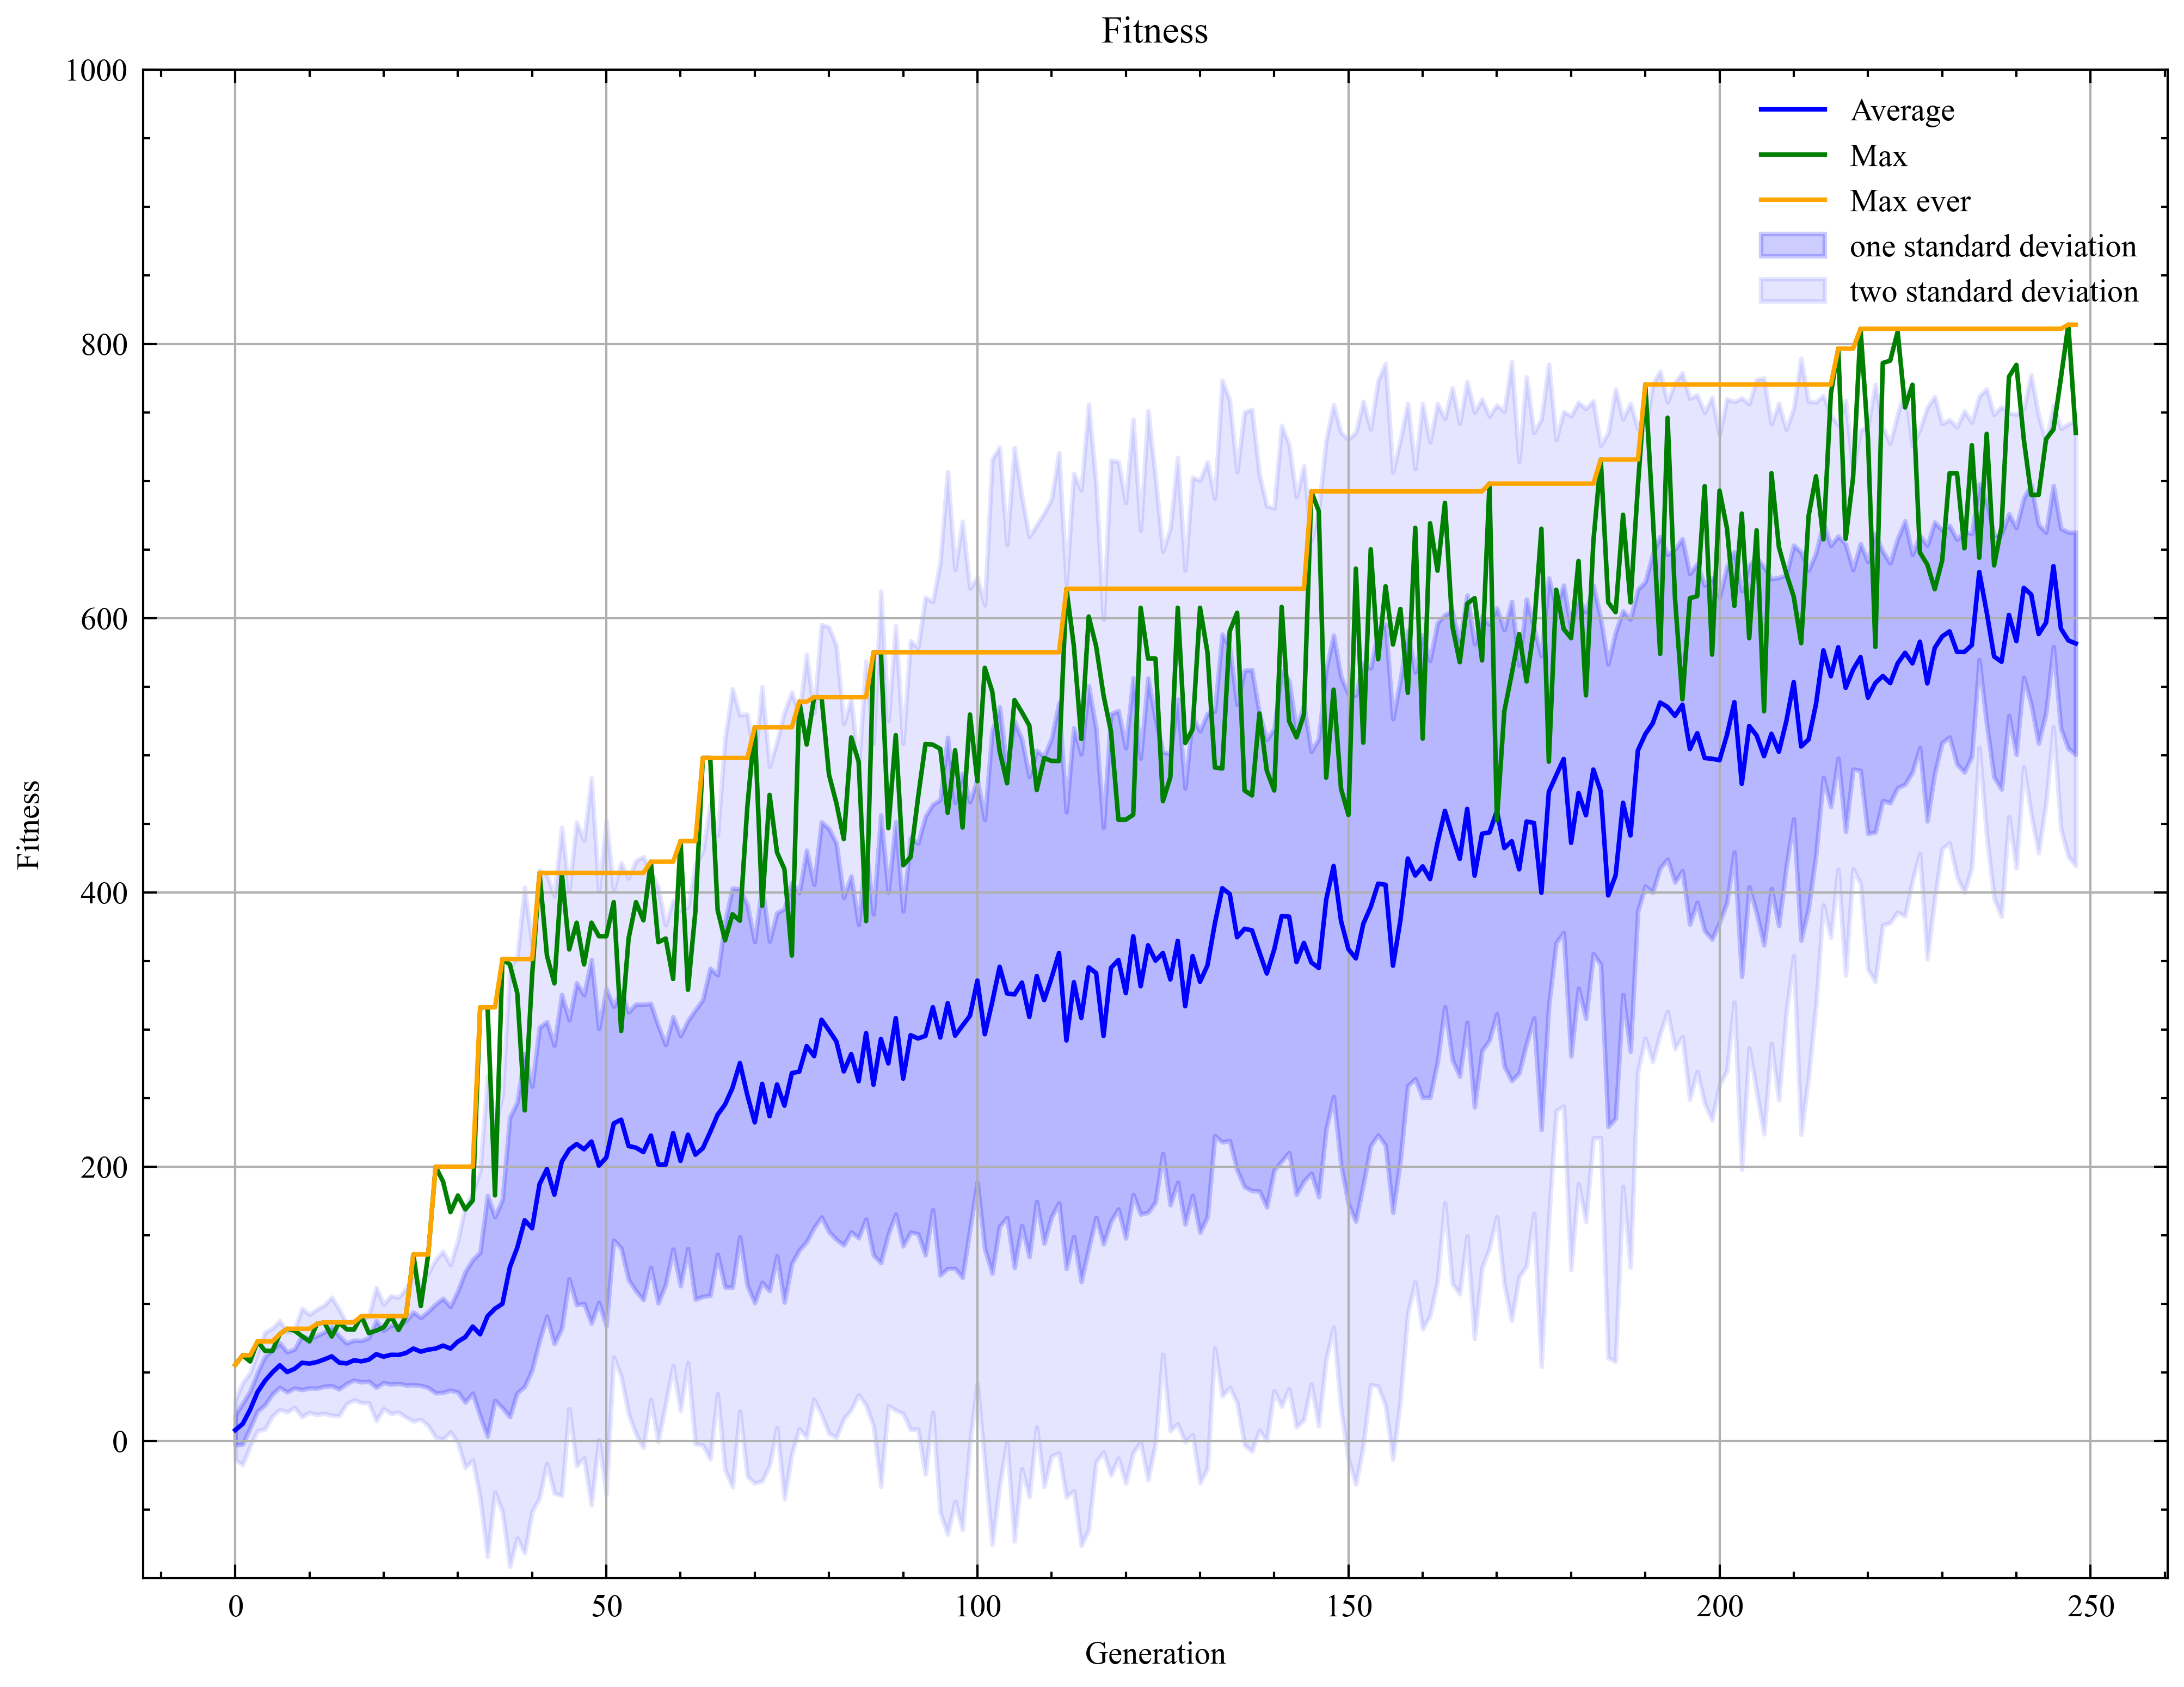

In [6]:
plt.style.use(['science', 'no-latex', 'nature'])
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.figure(figsize=(8, 6), dpi=600)

# データフレームの内容を表示
average = df['Average']
max = df['Max']
max_ever = df['Max ever']
std_plus = average + std_deviation_by_generation
std_minus = average - std_deviation_by_generation
std_2_plus = average + 2 * std_deviation_by_generation
std_2_minus = average - 2 * std_deviation_by_generation

# グラフを描画
x = np.arange(0, len(average))
plt.plot(x, average, label='Average', color='blue')
plt.plot(x, max, label='Max', color='green')
plt.plot(x, max_ever, label='Max ever', color='orange')
plt.fill_between(x, std_plus, std_minus, alpha=0.2, label='one standard deviation', color='blue')
plt.fill_between(x, std_2_plus, std_2_minus, alpha=0.1, label='two standard deviation', color='blue')

# グラフのタイトル
plt.title('Fitness')

# y軸の範囲を設定
plt.ylim(-100, 1000)

# x軸のラベル
plt.xlabel('Generation')

# y軸のラベル
plt.ylabel('Fitness')

# 凡例を表示
plt.legend()

# グリッドを表示
plt.grid(True)

# グラフを保存
plt.savefig('./img/fitness_AE.png')

# グラフを表示
plt.show()

# Dense

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

In [11]:
# テキストファイルを読み込む
with open('./ga-world-models-no_sampling_Dense/results/fitness_1_1_.txt', 'r') as file:  # 'data.txt'はファイルのパスを適切に指定してください
    lines = file.readlines()

# データを格納するための空のリストを作成
data = []

# 各行を処理してデータを抽出し、リストに追加
for line in lines:
    # 各行をタブで分割
    parts = line.strip().split('\t')
    
    # データを辞書に格納してリストに追加
    row_data = {
        'Average': float(parts[2]),
        'Max': float(parts[4]),
        'Max ever': float(parts[6]),
        'Time': float(parts[8])
    }
    
    data.append(row_data)

# リストからデータフレームを作成
df = pd.DataFrame(data)

# データフレームの内容を表示
print(df)

        Average         Max    Max ever        Time
0      9.246383   71.869842   71.869842   51.052963
1     14.957705   60.987383   71.869842   55.901079
2     27.616476   66.609477   71.869842   65.708628
3     42.117440   74.122277   74.122277  104.239249
4     49.658185   76.593471   76.593471   93.930814
..          ...         ...         ...         ...
180  484.245836  823.403965  823.403965  353.462868
181  504.761406  690.663042  823.403965  312.436640
182  477.300534  609.859054  823.403965  352.047764
183  509.788727  631.508973  823.403965  358.354740
184  495.606360  680.437994  823.403965  325.036041

[185 rows x 4 columns]


In [12]:
# テキストファイルを読み込む
with open('./ga-world-models-no_sampling_Dense/results/individual_fitness_1_1_.txt', 'r') as file:
    lines = file.readlines()

# データを格納するためのリストを初期化
data = []

# 各行を解析してデータを抽出
for line in lines:
    parts = line.strip().split()  # 空白文字で行を分割
    generation = int(parts[1])    # 世代番号を取得
    fitness = float(parts[3])     # Fitness値を取得
    data.append((generation, fitness))

# データフレームを作成
df2 = pd.DataFrame(data, columns=['Generation', 'Fitness'])

# データフレームの内容を表示
print(df2)

       Generation     Fitness
0               0   71.869842
1               0   56.071795
2               0   60.564952
3               0   69.569478
4               0   56.400000
...           ...         ...
18495         184  572.040803
18496         184  547.851163
18497         184  538.897744
18498         184  536.765854
18499         184  680.437994

[18500 rows x 2 columns]


In [13]:
# 世代ごとのfitnessの標準偏差を計算
std_deviation_by_generation = df2.groupby('Generation')['Fitness'].std()

# 結果を表示
print(std_deviation_by_generation)

Generation
0       17.026144
1       16.455204
2       17.736365
3       14.829600
4       13.513934
          ...    
180    132.794827
181    101.806783
182    116.840147
183    128.346573
184    117.126639
Name: Fitness, Length: 185, dtype: float64


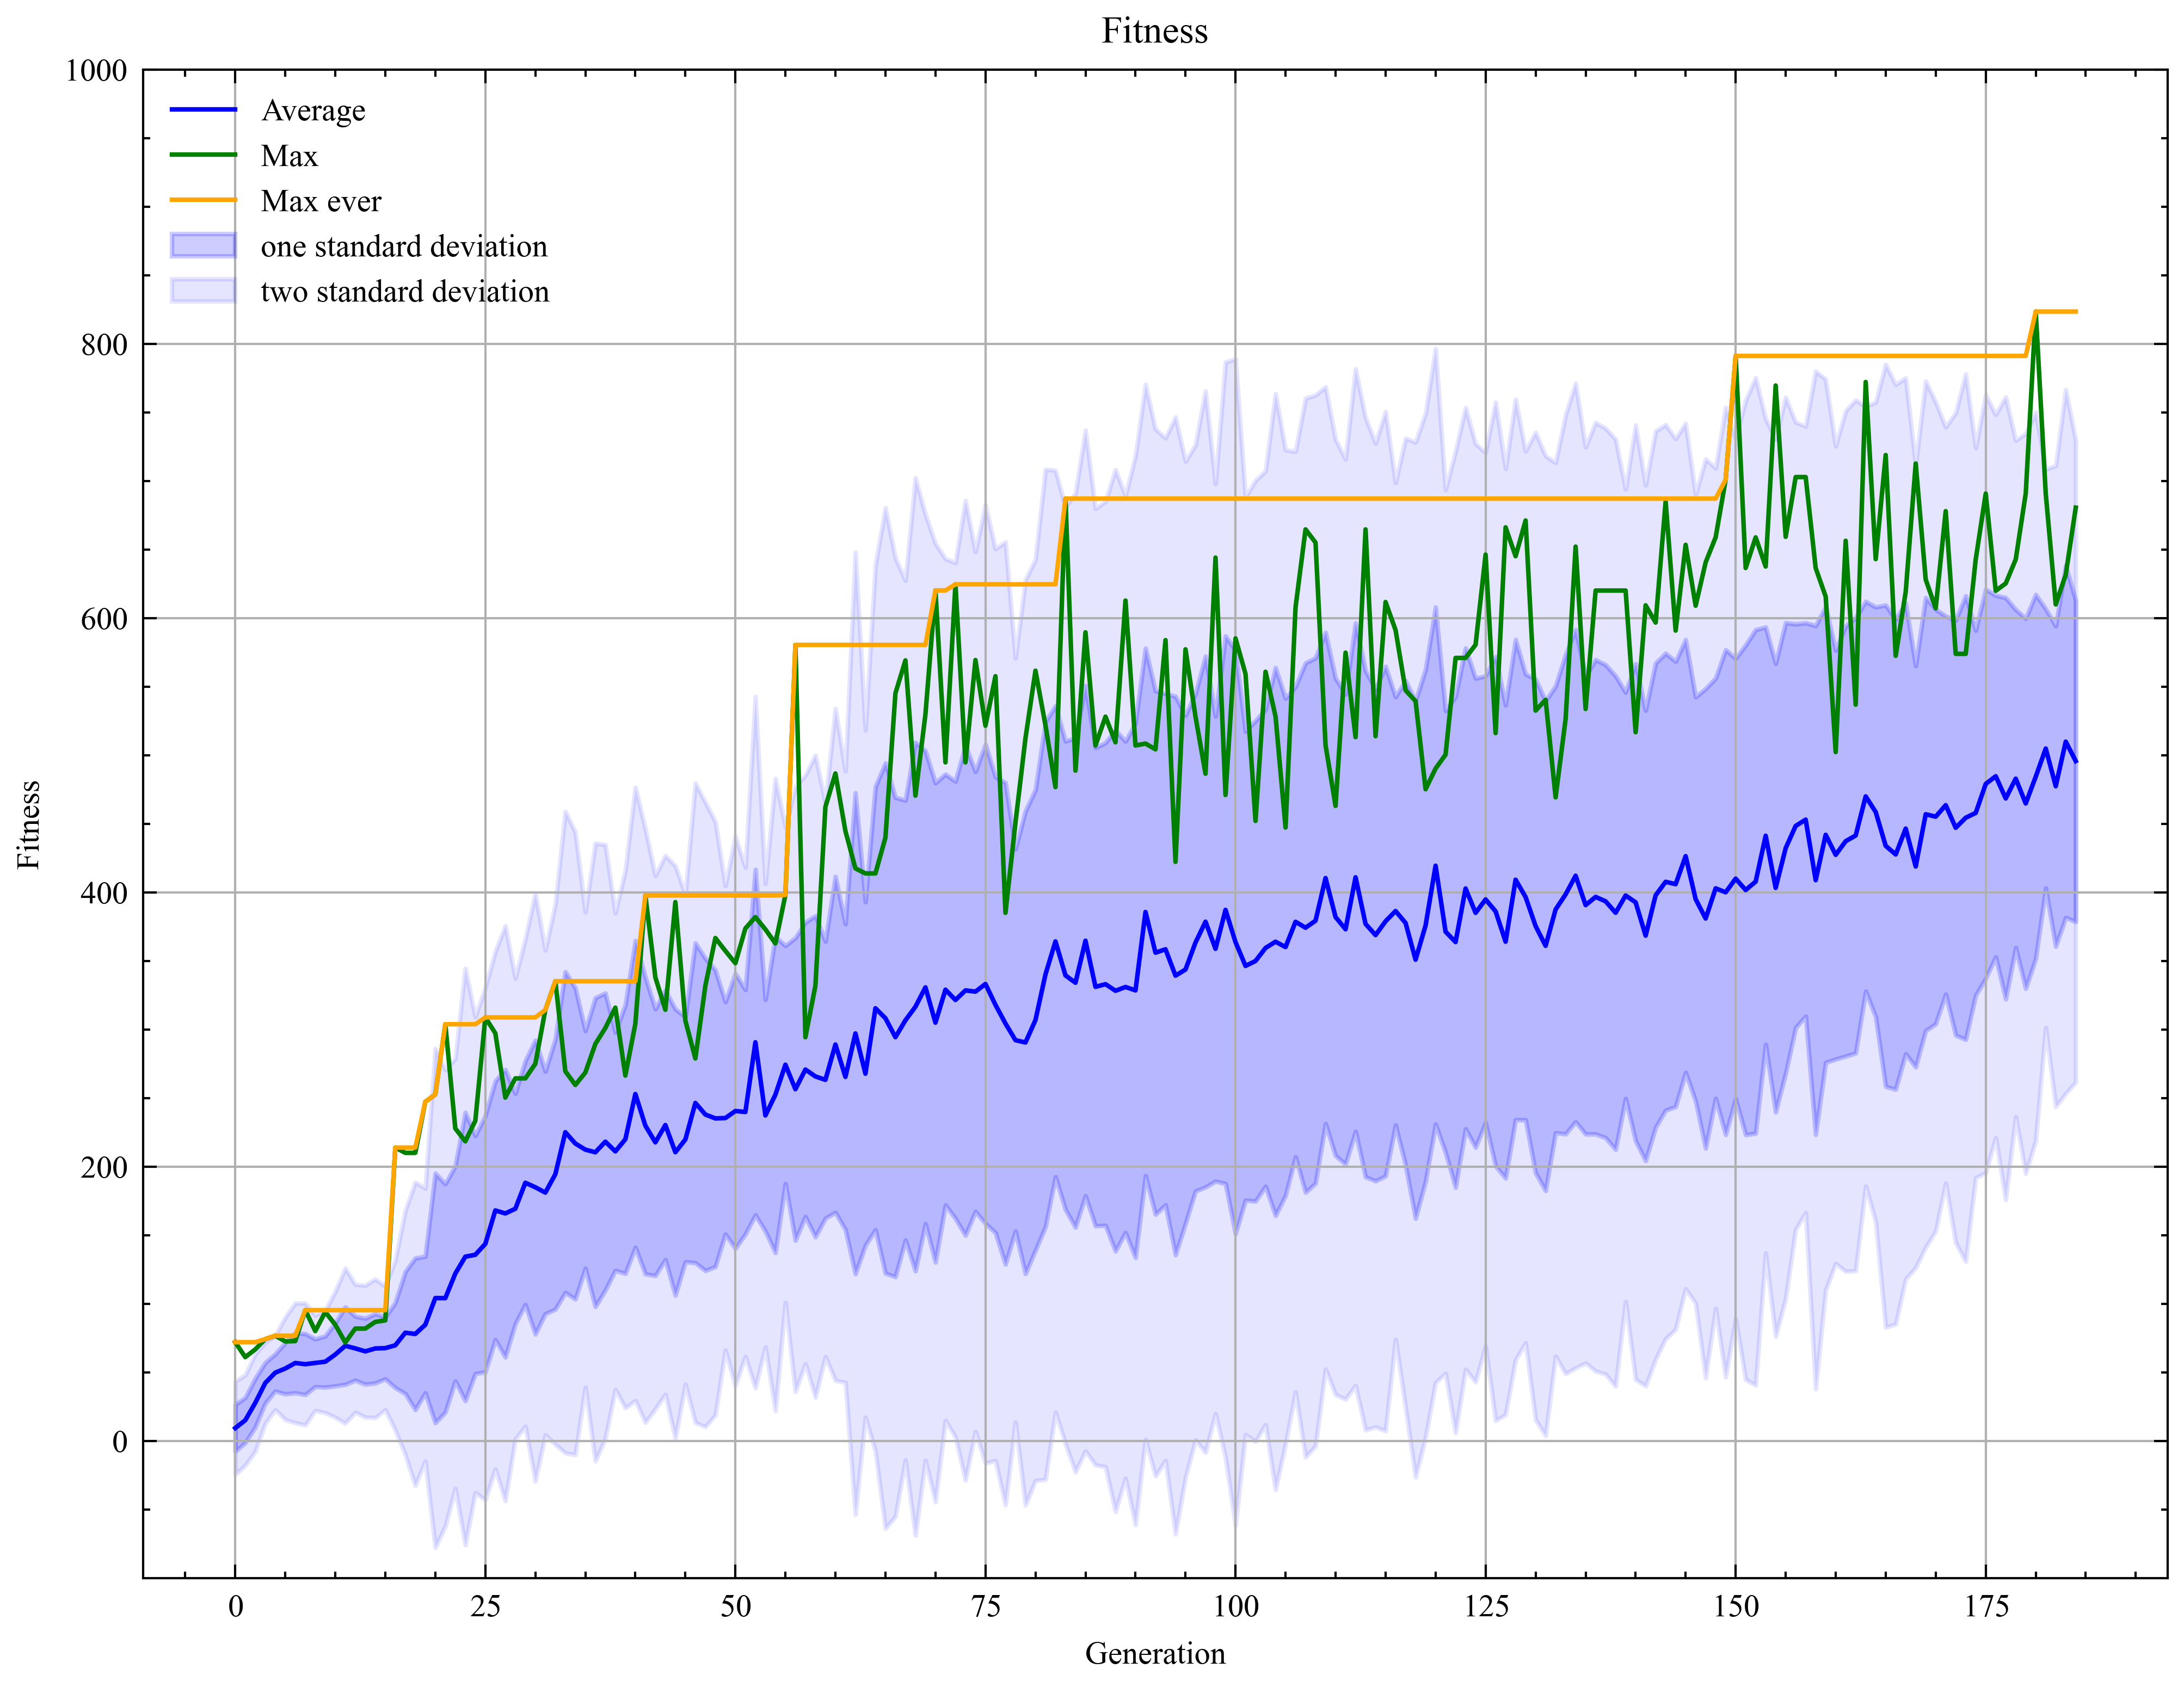

In [14]:
plt.style.use(['science', 'no-latex', 'nature'])
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.figure(figsize=(8, 6), dpi=600)

# データフレームの内容を表示
average = df['Average']
max = df['Max']
max_ever = df['Max ever']
std_plus = average + std_deviation_by_generation
std_minus = average - std_deviation_by_generation
std_2_plus = average + 2 * std_deviation_by_generation
std_2_minus = average - 2 * std_deviation_by_generation

# グラフを描画
x = np.arange(0, len(average))
plt.plot(x, average, label='Average', color='blue')
plt.plot(x, max, label='Max', color='green')
plt.plot(x, max_ever, label='Max ever', color='orange')
plt.fill_between(x, std_plus, std_minus, alpha=0.2, label='one standard deviation', color='blue')
plt.fill_between(x, std_2_plus, std_2_minus, alpha=0.1, label='two standard deviation', color='blue')

# グラフのタイトル
plt.title('Fitness')

# y軸の範囲を設定
plt.ylim(-100, 1000)

# x軸のラベル
plt.xlabel('Generation')

# y軸のラベル
plt.ylabel('Fitness')

# 凡例を表示
plt.legend()

# グリッドを表示
plt.grid(True)

# グラフを保存
plt.savefig('./img/fitness_Dense.png')

# グラフを表示
plt.show()

# 平均比較

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scienceplots

In [2]:
# 最良値の比較
file_name = "fitness_1_1_.txt"
folder_pathes = ["./ga-world-models-no_sampling/results/", "./ga-world-models-sampling/results/", "./ga-world-models-AE/results/", "./ga-world-models-no_sampling_Dense/results/", "./ga-world-models-sampling_Dense/results/"]

# データを格納するための空のリストを作成
data_dict = {
    "VAE without sampling": [],
    "VAE with sampling": [],
    "AE": [],
    "Dense": [],
}

for folder_path, key in zip(folder_pathes, data_dict.keys()):
    # テキストファイルを読み込む
    with open(folder_path + file_name, 'r') as file:
        lines = file.readlines()

    data = []

    # 各行を処理してデータを抽出し、リストに追加
    for line in lines:
        # 各行をタブで分割
        parts = line.strip().split('\t')

        # データを辞書に格納してリストに追加
        row_data = {
            'Average': float(parts[2]),
            'Max': float(parts[4]),
            'Max ever': float(parts[6]),
            'Time': float(parts[8])
        }

        data.append(row_data)
    
    df = pd.DataFrame(data)
    data_dict[key].append(df)

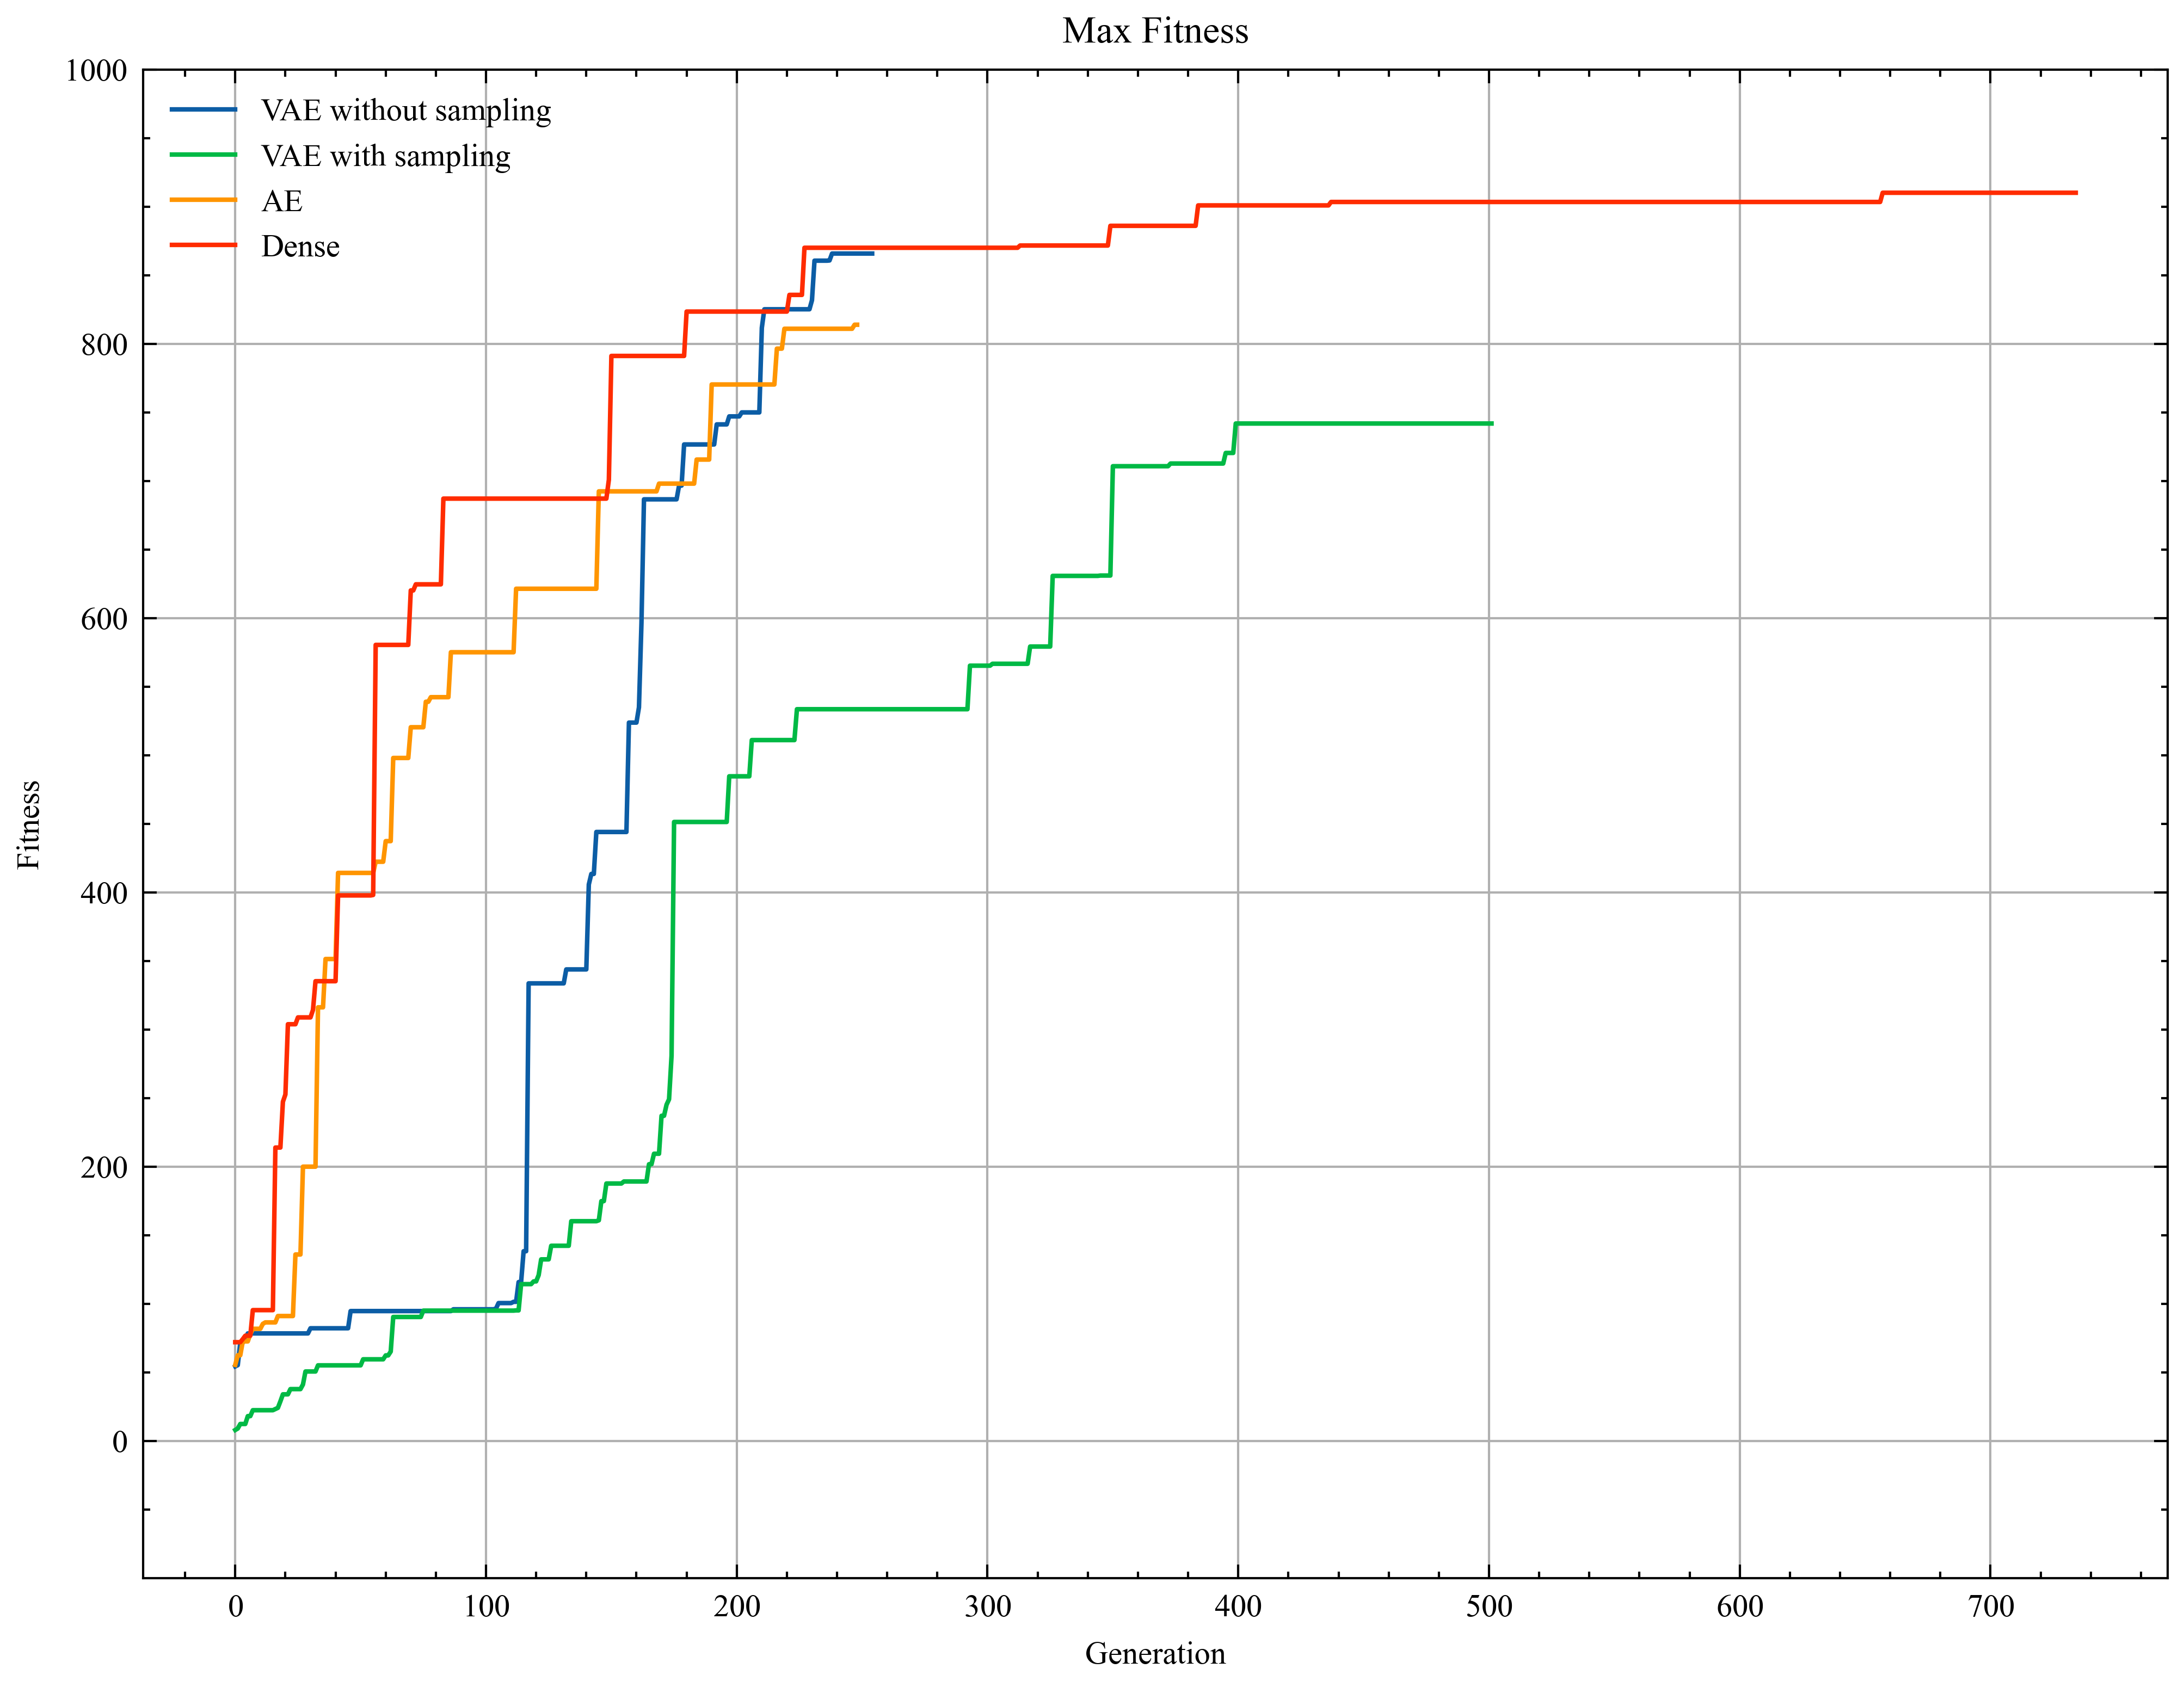

In [3]:
plt.style.use(['science', 'no-latex', 'nature'])
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.figure(figsize=(8, 6), dpi=600)

for key in data_dict.keys():
    df = data_dict[key][0]
    # データフレームの内容を表示
    max_ever = df['Max ever']
    
    # グラフを描画
    plt.plot(max_ever, label=key)

# グラフのタイトル
plt.title('Max Fitness')

# y軸の範囲を設定
plt.ylim(-100, 1000)

# x軸のラベル
plt.xlabel('Generation')

# y軸のラベル
plt.ylabel('Fitness')

# 凡例を表示
plt.legend()

# グリッドを表示
plt.grid(True)

# グラフを保存
plt.savefig('./img/fitness_MAX_compare.png')

# グラフを表示
plt.show()

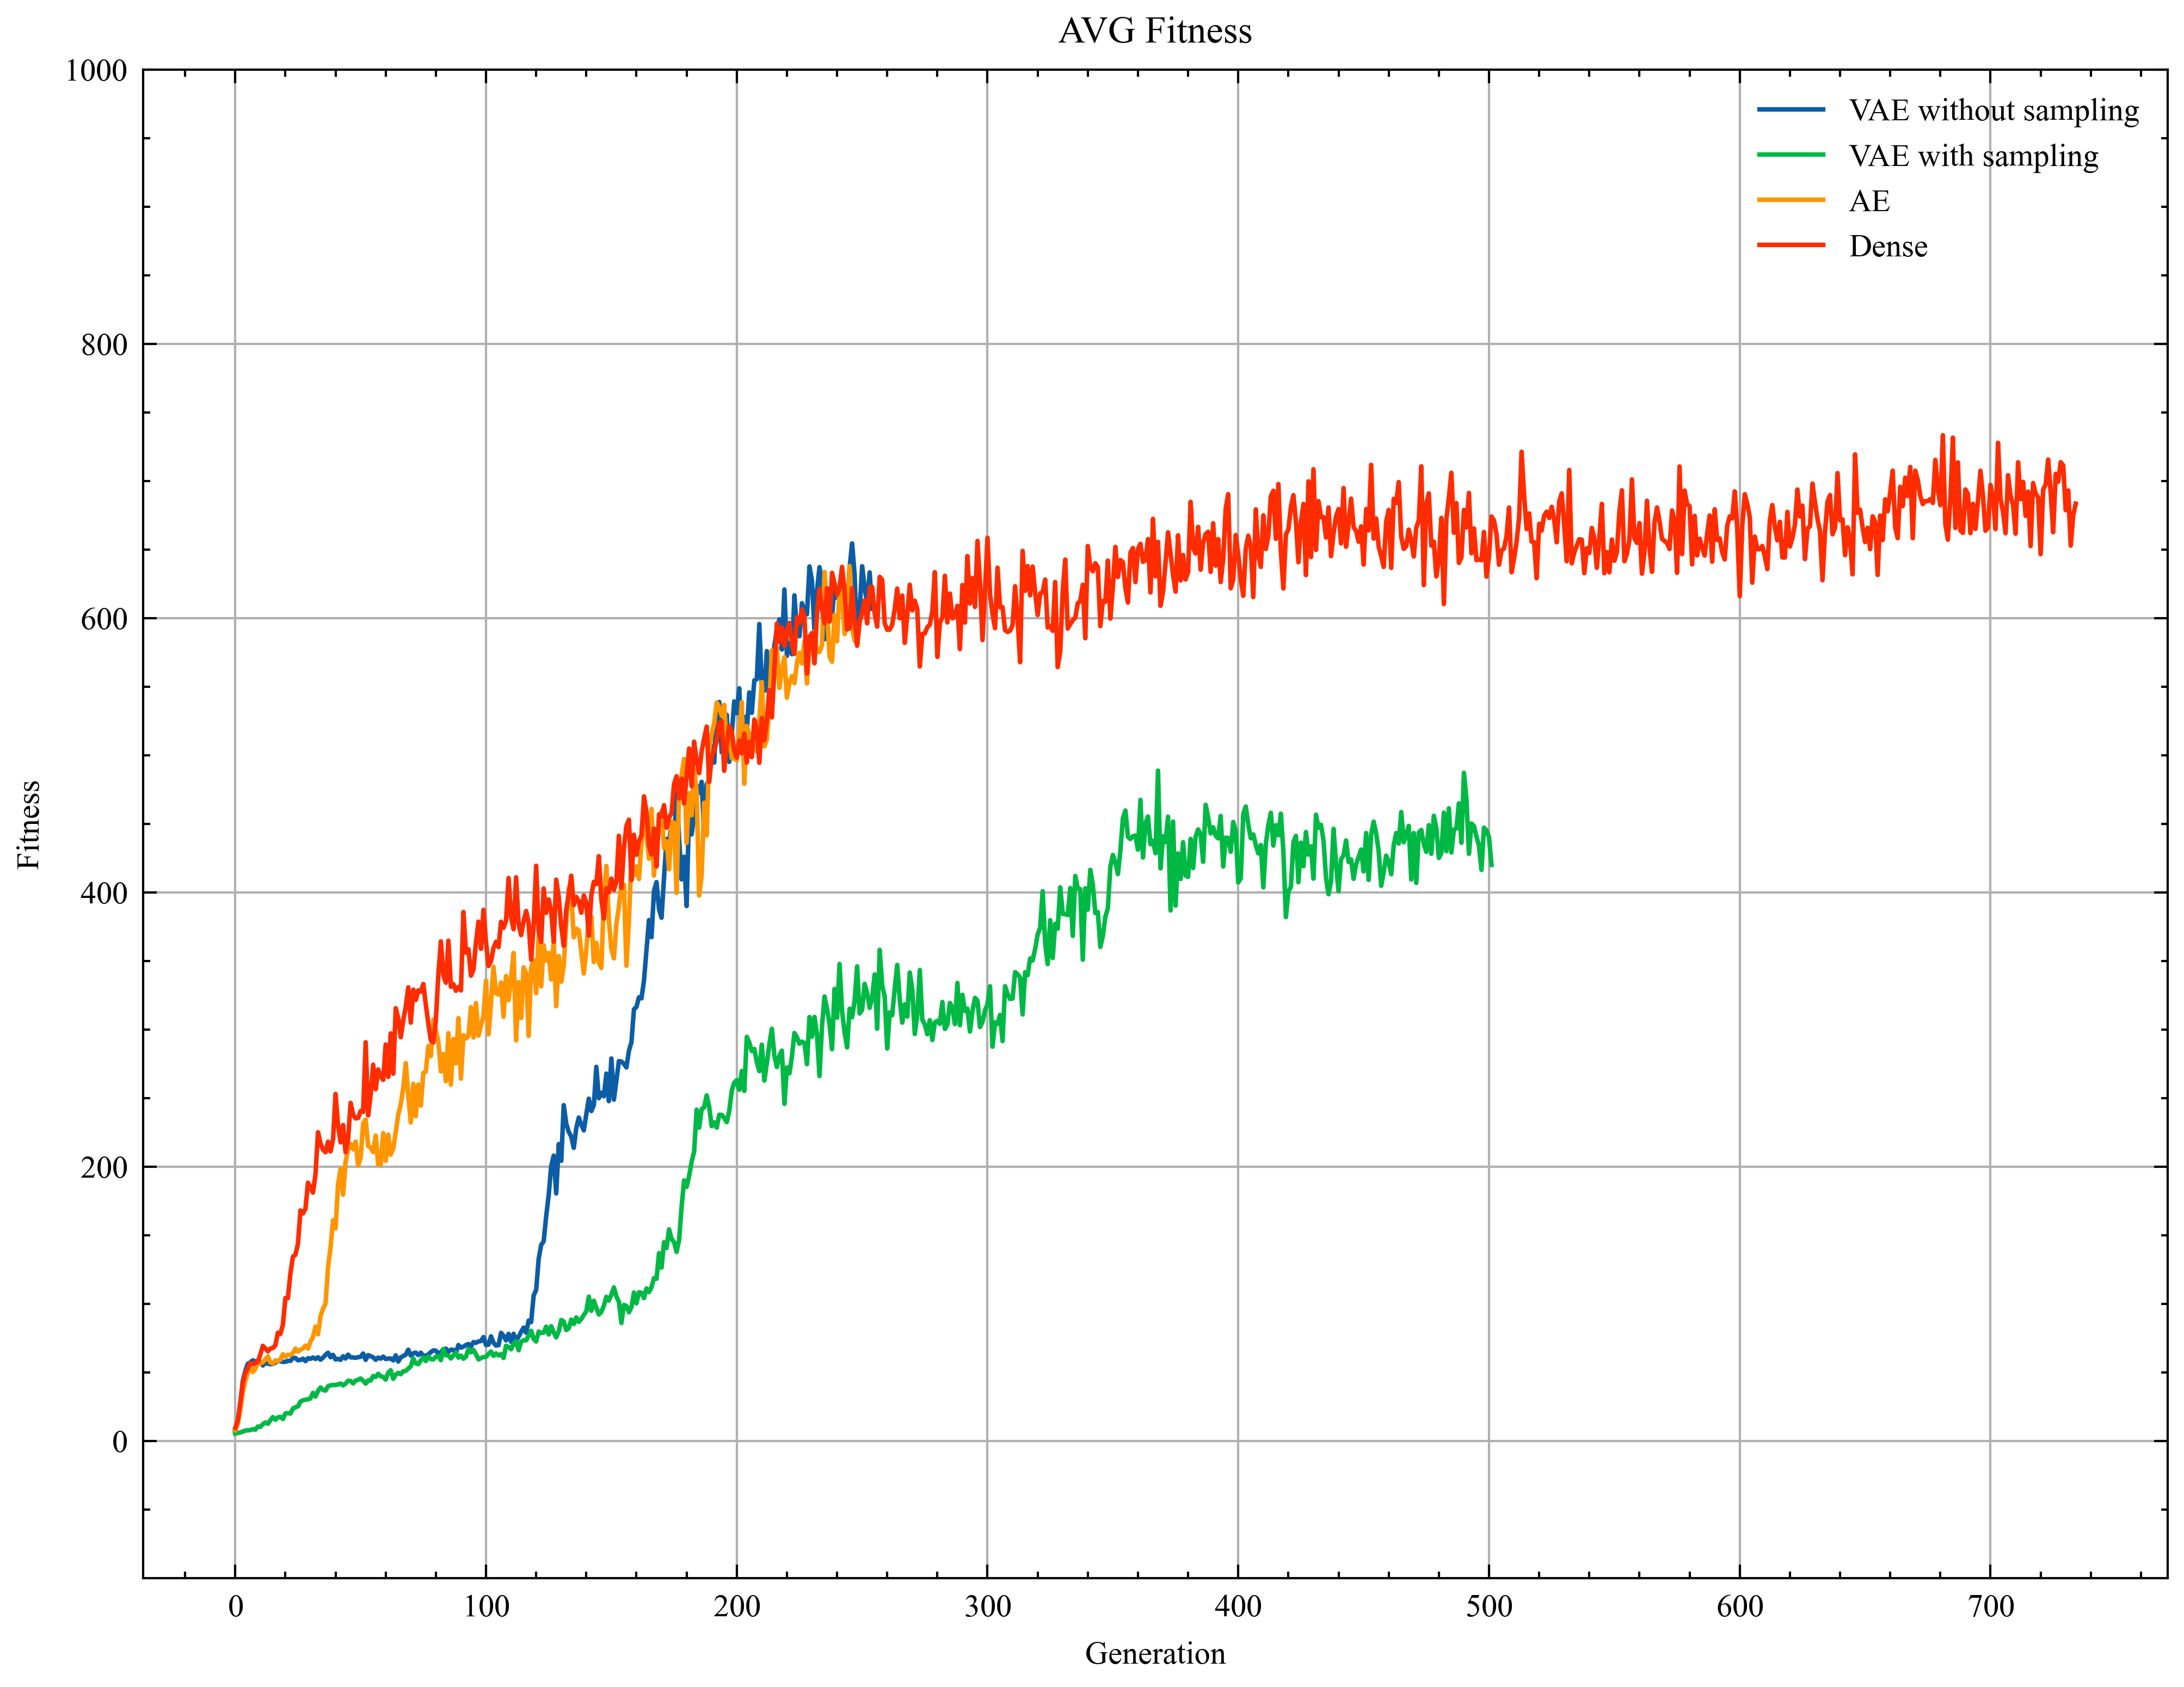

In [4]:
plt.style.use(['science', 'no-latex', 'nature'])
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.figure(figsize=(8, 6), dpi=600)

for key in data_dict.keys():
    df = data_dict[key][0]
    # データフレームの内容を表示
    max_ever = df['Average']
    
    # グラフを描画
    plt.plot(max_ever, label=key)

# グラフのタイトル
plt.title('AVG Fitness')

# y軸の範囲を設定
plt.ylim(-100, 1000)

# x軸のラベル
plt.xlabel('Generation')

# y軸のラベル
plt.ylabel('Fitness')

# 凡例を表示
plt.legend()

# グリッドを表示
plt.grid(True)

# グラフを保存
plt.savefig('./img/fitness_AVG_compare.png')

# グラフを表示
plt.show()

# モデルの形状

# 実験

In [2]:
import torch
import torch.nn as nn

# オートエンコーダーモデルの定義
class ConvAutoencoder(nn.Module):
    def __init__(self, latent_dim):
        super(ConvAutoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=4, stride=2, padding=1),  # 畳み込み層
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=4, stride=2, padding=1),  # 畳み込み層
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=4, stride=2, padding=1, output_padding=0),  # 転置畳み込み層
            nn.ReLU(),
            nn.ConvTranspose2d(16, 3, kernel_size=4, stride=2, padding=1, output_padding=0),  # 転置畳み込み層
            nn.Sigmoid()  # 画像ピクセル値の範囲を[0, 1]に制限
        )
        self.latent_dim = latent_dim

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded  # エンコーダーから潜在表現を返す

# オートエンコーダーモデルのインスタンス化
latent_dim = 32  # 32次元の潜在表現を持つオートエンコーダーを作成
autoencoder = ConvAutoencoder(latent_dim)

# モデルの要約を表示
print(autoencoder)

# モデルをテスト
input_data = torch.randn(1, 3, 64, 64)  # 64x64のRGB画像を1つ生成
latent_representation = autoencoder(input_data)  # エンコーダーから潜在表現を取得
print("潜在表現のサイズ:", latent_representation.size())


ConvAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(32, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(16, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (3): Sigmoid()
  )
)
潜在表現のサイズ: torch.Size([1, 32, 16, 16])
